In [1]:
import pandas as pd
import geopandas as gpd 
import os
import numpy

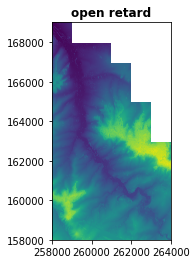

O:\3Dplotting_houses\resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k35.tif


In [2]:
import rasterio 
import rasterio.plot 
import os
from pathlib import Path

file_path = os.path.join(os.path.abspath(''), Path("resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k35.tif"))
tiff = rasterio.open(file_path)
rasterio.plot.show(tiff, title="open retard")
print(file_path)


In [3]:
type(tiff)

rasterio.io.DatasetReader

In [4]:
tiff.shape

(11000, 6000)

In [5]:
tiff

<open DatasetReader name='O:/3Dplotting_houses/resources/DSM_nl_unzip/GeoTIFF/DHMVIIDSMRAS1m_k35.tif' mode='r'>

In [6]:
tiff.count

1

In [7]:
tiff.bounds

BoundingBox(left=258000.0, bottom=158000.0, right=264000.0, top=169000.0)

In [15]:
tiff.bounds.left

258000.0

In [10]:
tiff.width

6000

In [11]:
from osgeo import osr, gdal
ds = gdal.Open(file_path)
old_cs = osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

0

In [12]:
import pprint
pprint.pp(gdal.Info(file_path, deserialize=False))

('Driver: GTiff/GeoTIFF\n'
 'Files: '
 'O:\\3Dplotting_houses\\resources\\DSM_nl_unzip\\GeoTIFF\\DHMVIIDSMRAS1m_k35.tif\n'
 'Size is 6000, 11000\n'
 'Coordinate System is:\n'
 'PROJCRS["BD72 / Belgian Lambert 72",\n'
 '    BASEGEOGCRS["BD72",\n'
 '        DATUM["Reseau National Belge 1972",\n'
 '            ELLIPSOID["International 1924",6378388,297,\n'
 '                LENGTHUNIT["metre",1]]],\n'
 '        PRIMEM["Greenwich",0,\n'
 '            ANGLEUNIT["degree",0.0174532925199433]],\n'
 '        ID["EPSG",4313]],\n'
 '    CONVERSION["Belgian Lambert 72",\n'
 '        METHOD["Lambert Conic Conformal (2SP)",\n'
 '            ID["EPSG",9802]],\n'
 '        PARAMETER["Latitude of false origin",90,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8821]],\n'
 '        PARAMETER["Longitude of false origin",4.36748666666667,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8822]],\n'
 '        PARAMETER["Latitude of 1st 

In [13]:
import pycrs
from pathlib import Path

path_file_prj = os.path.join(os.path.abspath(''), Path('\resources\DSM_nl_unzip\DHMVII_vdc_k01.zip'))

# for file in os.listdir(path_file_prj):
#     os.chdir(path_file_prj)
#     if file.endswith('.prj'):
crs = pycrs.load.from_file('resources\DSM_nl_unzip\DHMVII_vdc_k01.zip')
print(crs)
        

None


In [25]:
crs = pycrs.load.from_file('resources\DSM_nl_unzip\DHMVII_vdc_k33.prj')
crs

In [15]:
crs = pycrs.parse.from_epsg_code(8824)

In [16]:
print(crs)

In [38]:
from pyproj import CRS
test = CRS.from_epsg(31370)
test

<Derived Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [26]:
pprint.pp(gdal.Info("resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k11.tif", deserialize=False))

('Driver: GTiff/GeoTIFF\n'
 'Files: resources\\DSM_nl_unzip\\GeoTIFF\\DHMVIIDSMRAS1m_k11.tif\n'
 'Size is 15500, 8500\n'
 'Coordinate System is:\n'
 'PROJCRS["BD72 / Belgian Lambert 72",\n'
 '    BASEGEOGCRS["BD72",\n'
 '        DATUM["Reseau National Belge 1972",\n'
 '            ELLIPSOID["International 1924",6378388,297,\n'
 '                LENGTHUNIT["metre",1]]],\n'
 '        PRIMEM["Greenwich",0,\n'
 '            ANGLEUNIT["degree",0.0174532925199433]],\n'
 '        ID["EPSG",4313]],\n'
 '    CONVERSION["Belgian Lambert 72",\n'
 '        METHOD["Lambert Conic Conformal (2SP)",\n'
 '            ID["EPSG",9802]],\n'
 '        PARAMETER["Latitude of false origin",90,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8821]],\n'
 '        PARAMETER["Longitude of false origin",4.36748666666667,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8822]],\n'
 '        PARAMETER["Latitude of 1st standard parallel",51.16666

In [53]:
from pyproj import Proj, Transformer
in_proj = Proj('epsg:3857')
out_proj = Proj('epsg:31370')
x1,y1 = 50.836944262097674, 4.412508942584853
x2,y2 = transform(in_proj,out_proj,x1,y1)
print(x2,y2)

-529988.6618250113 -6145689.139256799


C:\Users\alebe\AppData\Local\Temp\ipykernel_15416\3173710117.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2,y2 = transform(in_proj,out_proj,x1,y1)


In [9]:
from pyproj import Proj, Transformer
x = Transformer.from_crs("epsg:4326", "epsg:31370")
y = x.transform(50.83328332575651, 4.486834876965997)

In [10]:
y[0], y[1]


(158318.45218743282, 169213.77478076983)

In [11]:
pa = x.transform(50.82257231642299, 4.486812551815184)
pa

(158318.78500903776, 168022.2792733321)

In [12]:
type(y[0])

float

Our coordinates are inside the DHMVIIDSMRAS1m_k05.tif file.
Our coordinates are inside the DHMVIIDSMRAS1m_k05.tif file.


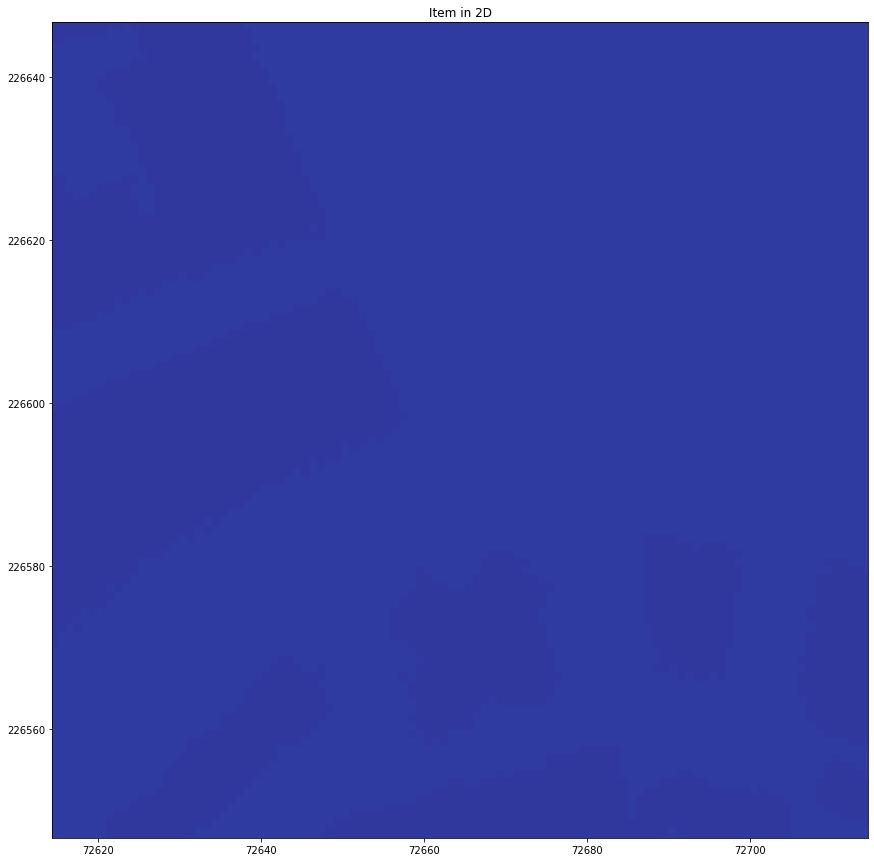

(72664.43172377795, 226596.70960106794)
Our coordinates are inside the DHMVIIDSMRAS1m_k05.tif file.


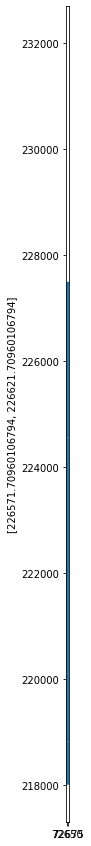

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from plotting import Plotting
import numpy as np

test = Plotting(51.34395808132645, 3.2588635662958314)
coord = test.transform_coord()
print(coord)
test.wich_file()
slice = 25
x_bounds = [coord[0] - slice, coord[0] + slice]
y_bounds = [coord[1] - slice, coord[1] + slice]

t5_shape = gpd.read_file('resources\DSM_nl_unzip\DHMVII_vdc_k5.shp')
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
t5_shape.plot(ax=ax, legend=True)
plt.show()

In [21]:
t5_shape

,Date,OpnDatum1,OpnDatum2,geometry
0,20140319,2014-03-19,None,"POLYGON Z ((86000.000 230206.366 0.000, 85998...."
1,20140317,2014-03-19,2014-03-17,"POLYGON Z ((86000.000 230206.366 0.000, 86000...."
2,20140317,2014-03-17,None,"MULTIPOLYGON Z (((97000.000 228000.000 0.000, ..."
3,20140317,2014-03-17,2014-03-30,"MULTIPOLYGON Z (((95075.940 227675.980 0.000, ..."
4,20140330,2014-03-30,None,"POLYGON Z ((87000.000 227360.941 0.000, 87000...."
5,20140330,2014-03-30,2014-03-31,"MULTIPOLYGON Z (((67106.560 224569.260 0.000, ..."
6,20140331,2014-03-31,None,"POLYGON Z ((98000.000 224213.494 0.000, 98000...."
7,20140331,2014-03-31,2014-04-01,"MULTIPOLYGON Z (((66364.220 220127.500 0.000, ..."
8,20140401,2014-04-01,None,"POLYGON Z ((69144.125 219908.699 0.000, 69148...."
9,20140401,2014-04-01,2014-04-02,"POLYGON Z ((98000.000 219184.145 0.000, 98000...."


In [22]:
t5_shape.geometry.name

'geometry'

In [28]:
my_gpd = t5_shape.cx[(coord[0] - slice):(coord[0] + slice), (coord[1] - slice):(coord[1] + slice)]

C:\Users\alebe\Envs\3Dhouse\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

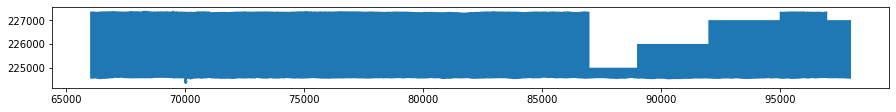

In [34]:
my_gpd.plot(figsize=(15,15))

In [42]:
my_gpd

,Date,OpnDatum1,OpnDatum2,geometry
4,20140330,2014-03-30,None,"POLYGON Z ((87000.000 227360.941 0.000, 87000...."


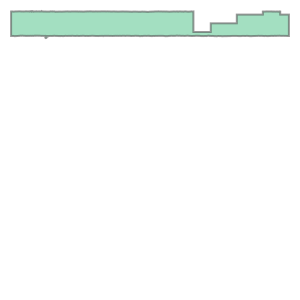

In [46]:
t5_shape.loc[4,"geometry"]

C:\Users\alebe\Envs\3Dhouse\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


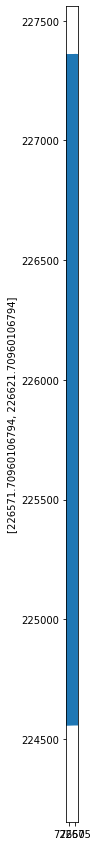

In [47]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
my_gpd.plot(ax=ax, legend=True)
plt.show()

In [2]:
print(t5_shape.loc[4,"geometry"])

POLYGON Z ((87000.00003342285 227360.94122482912 0, 87000.00003342285 227000.00002482912 0, 87000.00003342285 226500.00002482912 0, 87000.00003342285 226000.00002482912 0, 87000.00003342285 225500.00002482912 0, 87000.00003342285 225000.00002482912 0, 87500.00003342285 225000.00002482912 0, 88000.00003342285 225000.00002482912 0, 88500.00003342285 225000.00002482912 0, 89000.00003342285 225000.00002482912 0, 89000.00003342285 225500.00002482912 0, 89000.00003342285 226000.00002482912 0, 89500.00003342285 226000.00002482912 0, 90000.00003342285 226000.00002482912 0, 90500.00003342285 226000.00002482912 0, 91000.00003342285 226000.00002482912 0, 91500.00003342285 226000.00002482912 0, 92000.00003342285 226000.00002482912 0, 92000.00003342285 226500.00002482912 0, 92000.00003342285 227000.00002482912 0, 92500.00003342285 227000.00002482912 0, 93000.00003342285 227000.00002482912 0, 93500.00003342285 227000.00002482912 0, 94000.00003342285 227000.00002482912 0, 94500.00003342284 227000.000

Our coordinates are inside the DHMVIIDSMRAS1m_k31.tif file.
Our coordinates are inside the DHMVIIDSMRAS1m_k31.tif file.


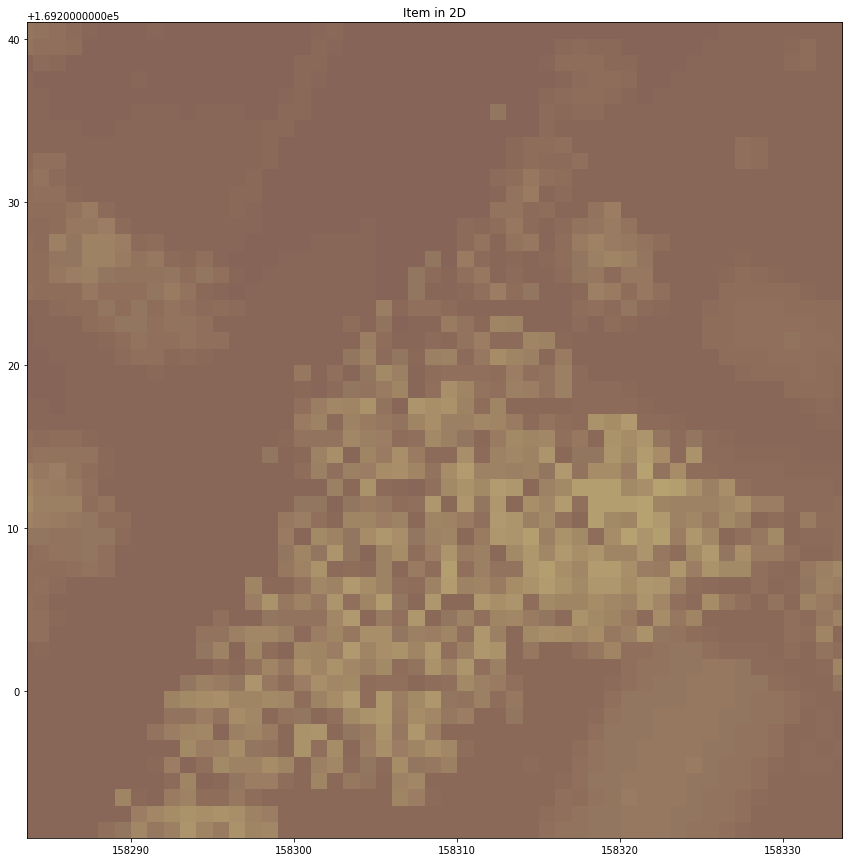

In [3]:
test_wo = Plotting(50.83330365407295, 4.486695401854129)
test_wo.transform_coord()
test_wo.wich_file()
test_wo.plot_2d(slice=25)

(158308.62313240045, 169216.02039918676)
Our coordinates are inside the DHMVIIDSMRAS1m_k31.tif file.


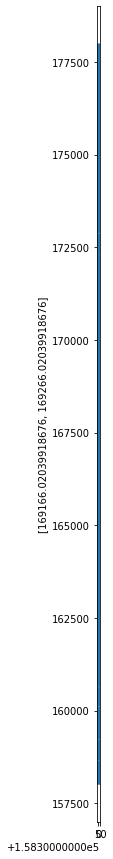

In [4]:
t31_shape = gpd.read_file('resources\DSM_nl_unzip\DHMVII_vdc_k31.shp')
coord = test_wo.transform_coord()
print(coord)
test_wo.wich_file()
slice = 50
x_bounds = [coord[0] - slice, coord[0] + slice]
y_bounds = [coord[1] - slice, coord[1] + slice]
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
t31_shape.plot(ax=ax, legend=True)
plt.show()

In [5]:
my_gpd = t31_shape.cx[(coord[0] - slice):(coord[0] + slice), (coord[1] - slice):(coord[1] + slice)]

In [6]:
my_gpd

,Date,OpnDatum1,OpnDatum2,OpnDatum3,OpnDatum4,geometry
35,['20140330'],2014-03-25,2014-03-30,None,None,"POLYGON ((160267.875 172231.176, 160264.950 17..."


<AxesSubplot:>

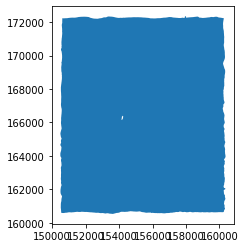

In [7]:
my_gpd.plot()

In [10]:
from affine import Affine
import xarray as xr
da = xr.open_rasterio(test_wo.wich_file())
transform = Affine.from_gdal(*da.attrs["transform"]) # this is important to retain the geographic attributes from the file

Our coordinates are inside the DHMVIIDSMRAS1m_k31.tif file.


C:\Users\alebe\AppData\Local\Temp\ipykernel_9984\2156617491.py:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  da = xr.open_rasterio(test_wo.wich_file())


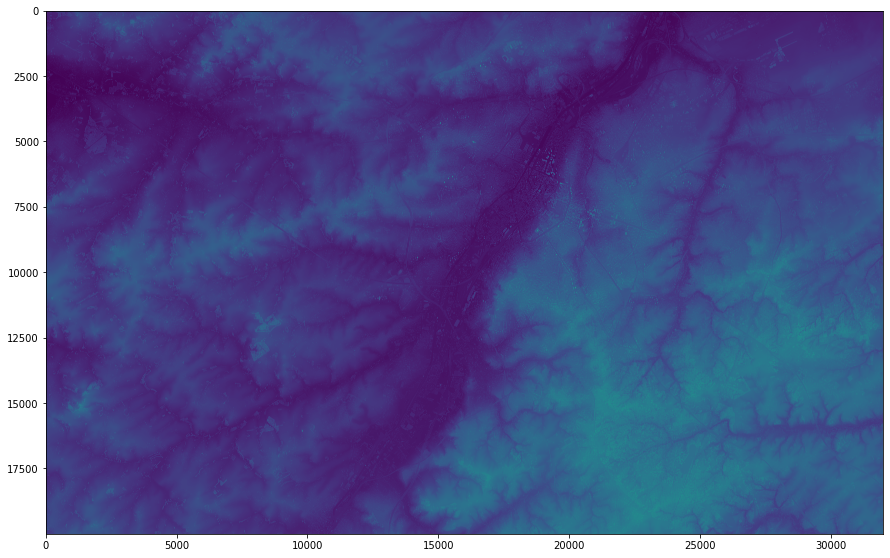

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
ax.set_xlim(x_bounds)
ax.set_ylabel(y_bounds)
plt.show()

In [ ]:
from plotting import Plotting
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
ax.set_xlim(test_wo.x_bounds())
ax.set_ylabel(test_wo.y_bounds())
plt.show()

Our coordinates are inside the DHMVIIDSMRAS1m_k31.tif file.


C:\Users\alebe\AppData\Local\Temp\ipykernel_9984\1029571720.py:12: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  da = xr.open_rasterio(path_gtif)


MemoryError: Unable to allocate 2.38 GiB for an array with shape (1, 20000, 32000) and data type float32

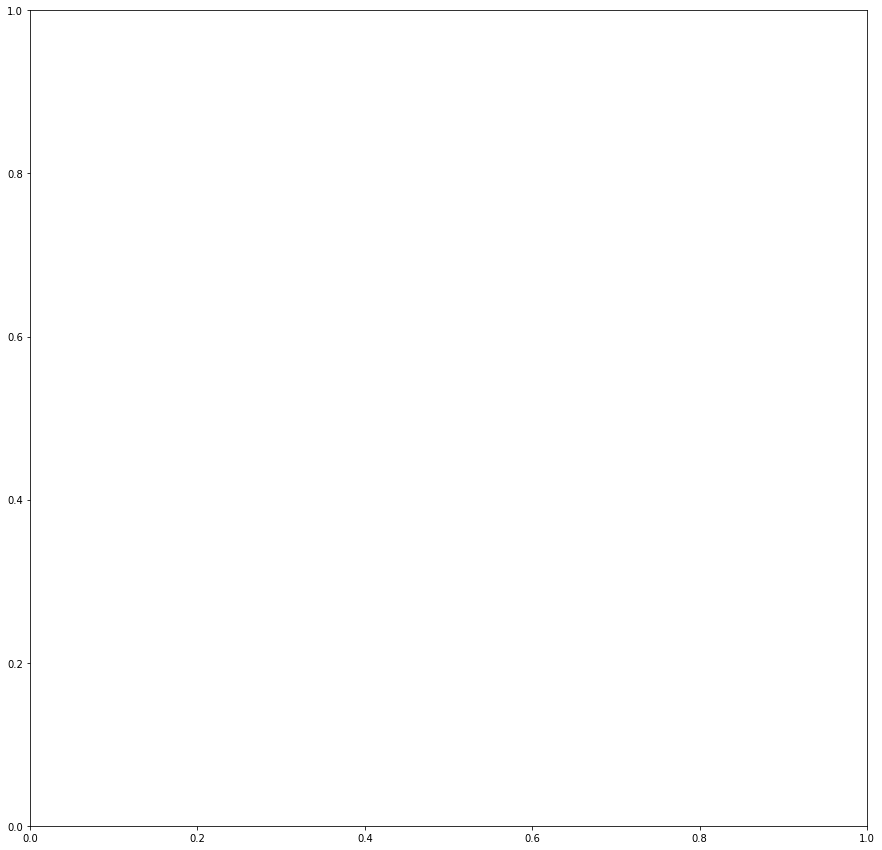

In [17]:
from plotting import Plotting
from affine import Affine
import xarray as xr 
import geopandas as gpd
import matplotlib.pyplot as plt

test_wo = Plotting(50.83330365407295, 4.486695401854129)
test_wo.transform_coord()

path_gtif = test_wo.wich_file()

da = xr.open_rasterio(path_gtif)
transform = Affine.from_gdal(*da.attrs["transform"])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(da.variable.data[0])
ax.set_xlim(test_wo.x_bounds_calc(slice=250))
ax.set_ylabel(test_wo.y_bounds_calc(slice=250))
plt.show()

In [23]:
import plotly.graph_objects as go
import pandas as pd
import rasterio

In [45]:
test_2d = Plotting(50.83330365407295, 4.486695401854129)

In [25]:
test_2d.transform_coord()

(158308.62313240045, 169216.02039918676)

In [ ]:
test_2.

In [42]:
right = 158308 + 25
left = 158308 - 25 
top = 169216 + 25 
bottom = 169216 - 25

In [40]:
right

158408

In [72]:
from rasterio.windows import Window

# window_test = rasterio.windows.from_bounds(left=left, bottom=bottom, right=right, top=top)

with rasterio.open('resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k31.tif') as src:
    w = src.read(1, window=rasterio.windows.from_bounds(left, bottom, right, top, transform=src.transform))

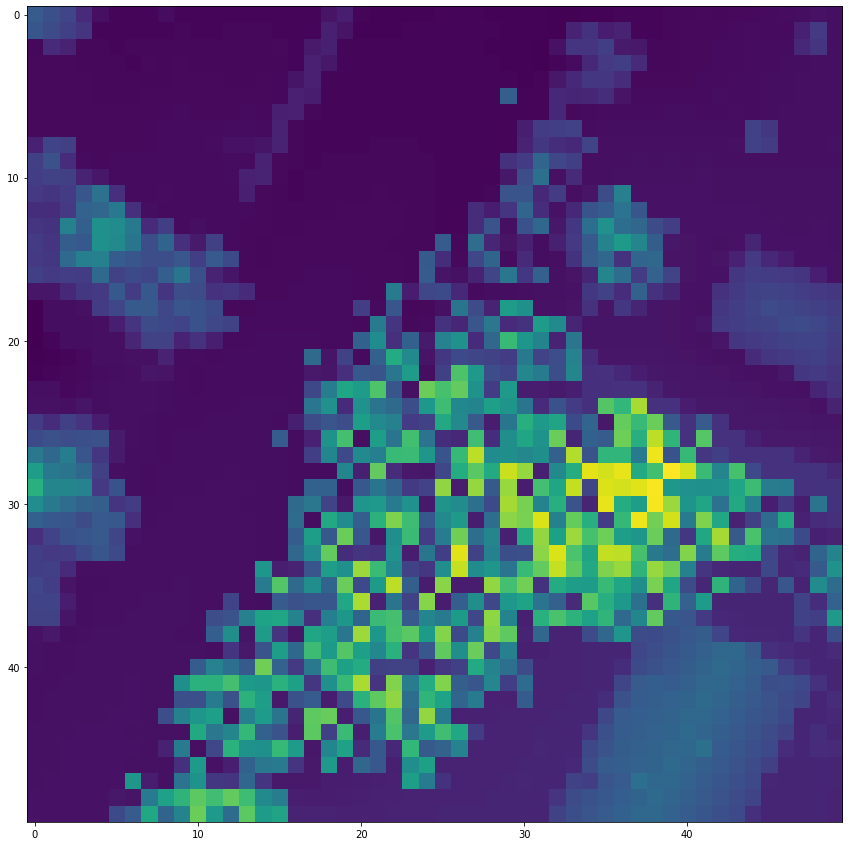

In [73]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(w)
plt.show()

In [71]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(w)])
fig.show()

ValueError: The first argument to the plotly.graph_objs.Surface 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Surface`

In [46]:
ft = rasterio.open('resources\DSM_nl_unzip\GeoTIFF\DHMVIIDSMRAS1m_k31.tif')

In [47]:
ft.count

1

In [48]:
ft.width

32000

In [49]:
ft.height

20000

In [50]:
ft.bounds

BoundingBox(left=130000.0, bottom=158000.0, right=162000.0, top=178000.0)

In [51]:
ft.transform

Affine(1.0, 0.0, 130000.0,
       0.0, -1.0, 178000.0)

In [53]:
ft.transform * (ft.width, ft.height)

(162000.0, 158000.0)

In [54]:
band1 = ft.read(1)
band1

array([[34.52, 34.53, 34.55, ..., 33.08, 33.13, 33.06],
       [34.5 , 34.5 , 34.51, ..., 33.08, 33.12, 33.1 ],
       [34.56, 34.48, 34.5 , ..., 33.11, 33.1 , 33.11],
       ...,
       [65.42, 66.42, 66.39, ..., 95.82, 95.76, 95.82],
       [77.36, 78.88, 66.75, ..., 95.82, 95.82, 95.79],
       [79.53, 78.39, 77.65, ..., 95.75, 96.04, 96.47]], dtype=float32)